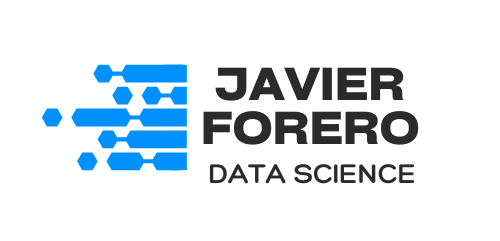

<center><h1> Aplicaciones de IA en la gestión empresarial </header1></center>
<left><h1> Caso integrador: Problema del
Agente Viajero (TSP)</header1></left>

**Analista**: Gerardo Javier Forero Ortiz

**Fecha:** 04/04/2025

# **Problema del Agente Viajero (TSP): empresa de gaseosa**

En el presente ejercicio se buscará resolver el Problema del
Agente Viajero (TSP), para una emprea de gaseosas que requiere abastecer sus bodegas que se encuentran ubicadas en las cinco ciudades más pobladas de Colombia:

- Bogotá: 7'968. 095 habitantes

- Medellín:2'653.729 habitantes

- Cali: 2'297.230 habitantes

- Barranquilla: 1'327.209 habitantes

- Cartagena: 1'065. 570 habitantes


Fuente:  Departamento Administrativo Nacional de Estadística


El problema del agente viajero (TSP) es un problema de optimización que consiste en encontrar la ruta más corta para visitar una lista de ciudades.



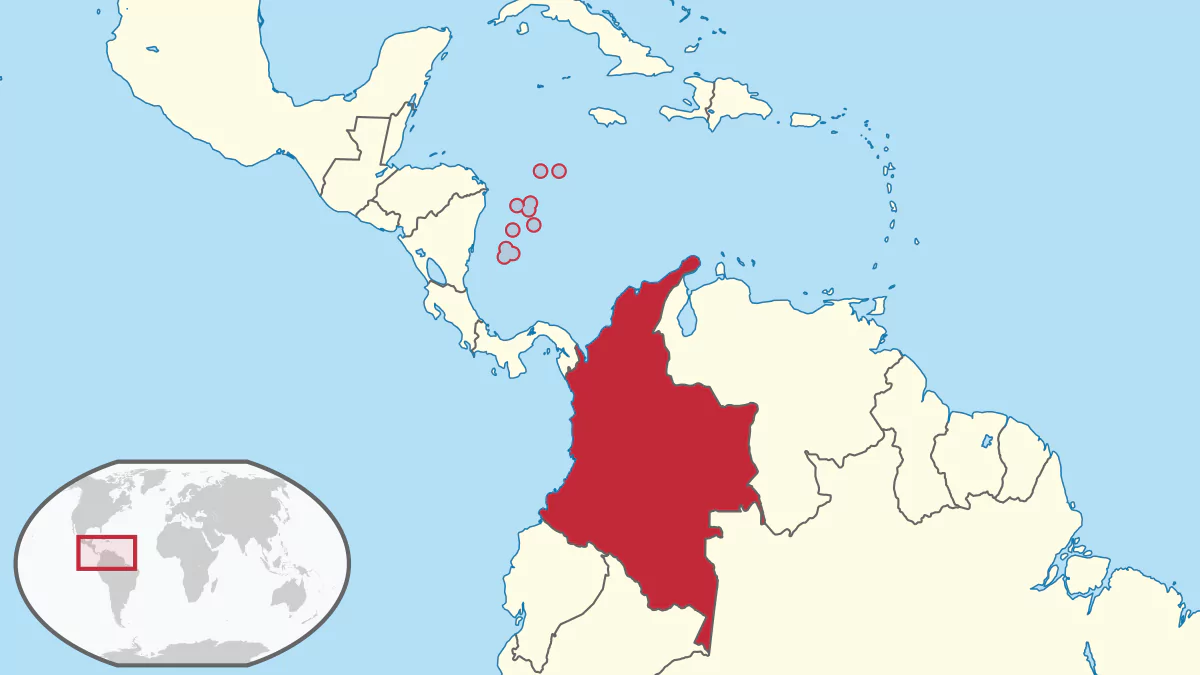

Para resolver el presente problema se adoptará la siguiente metodología:

- Obtención de las distancias entre las cinco ciudades objetivo: Bogotá, Medellín, Cali, Barranquilla y Cartagena.
- Ubicación de las ciudades en el mapa según sus nodos y distancias.
- Aplicación del algoritmo de colonia de hormigas. Medición de la precisión y eficiencia del algoritmo
- Aplicación del algoritmo de fuerza bruta. Medición de la precisión y eficiencia del algoritmo
- Aplicación del algortimo de TSP. Medición de la precisión y eficiencia del algoritmo
- Conclusión y análisis de los resultados.

# OBTENCIÓN DE LOS DATOS

## Importar librerías

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

Para acceder a los datos de las distancias entre ciudades, tomamos los datos del portal Colombia mejores rutas, que contiene el recorrido entre un punto y otro en kilómetros. Los datos se encuentran en la siguiente dirección y se pueden obtener en archivo csv: https://colombia.mejoresrutas.com/tabla-de-distancias/co/


## Carga de datos

In [ ]:
ciudades = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS6k_kF96lF8w314i45NG6_cIV4oNDaocpFWdGltZa42WoNYzd_DV0Bi2qn8zhpvwXEOJJmYFrSmvhG/pub?gid=1358267516&single=true&output=tsv')
ciudades.head(6)

,Distancia (kilómetros),Bogotá,Cali,Medellín,Barranquilla,Cartagena,Cúcuta,Bucaramanga,Pereira,Santa Marta,Ibagué,Pasto,Manizales,Neiva,Villavicencio,Armenia
0,Bogotá,NaN,463.0,419.0,1009.0,1052.0,599.0,409.0,322.0,968.0,193.0,764.0,317.0,301.0,110.0,275.0
1,Cali,461.0,NaN,440.0,1144.0,1098.0,984.0,785.0,215.0,1231.0,274.0,393.0,268.0,382.0,558.0,187.0
2,Medellín,419.0,439.0,NaN,704.0,659.0,592.0,392.0,224.0,795.0,361.0,816.0,209.0,590.0,529.0,280.0
3,Barranquilla,1006.0,1139.0,702.0,NaN,122.0,669.0,642.0,924.0,102.0,991.0,1517.0,910.0,1178.0,1117.0,980.0
4,Cartagena,1078.0,1094.0,656.0,124.0,NaN,740.0,713.0,879.0,225.0,1015.0,1471.0,864.0,1249.0,1188.0,934.0
5,Cúcuta,596.0,982.0,590.0,669.0,741.0,NaN,200.0,767.0,628.0,705.0,1354.0,718.0,891.0,706.0,789.0


# **Preprocesamiento de los datos**

Se procederá a continuación a filtrar el dataframe para tener solo las cinco ciudades que nos interesan para el presente objetivo. Igualmente, los valores nulos se reemplazarán por el número 0, teniendo en cuenta que la distancia en kilómetros entre la misma ciudad es 0.

In [ ]:
# Definir las ciudades de interés
ciudades_interes = ['Bogotá', 'Cali', 'Medellín', 'Barranquilla', 'Cartagena']

# Filtrar filas y columnas para mantener solo las ciudades de interés
df_filtrado = ciudades.loc[ciudades['Distancia (kilómetros)'].isin(ciudades_interes),
                           ['Distancia (kilómetros)'] + ciudades_interes]

# Mostrar el dataframe filtrado
print("Dataframe filtrado con las 5 ciudades principales:")
df_filtrado.head(5)

Dataframe filtrado con las 5 ciudades principales:


,Distancia (kilómetros),Bogotá,Cali,Medellín,Barranquilla,Cartagena
0,Bogotá,NaN,463.0,419.0,1009.0,1052.0
1,Cali,461.0,NaN,440.0,1144.0,1098.0
2,Medellín,419.0,439.0,NaN,704.0,659.0
3,Barranquilla,1006.0,1139.0,702.0,NaN,122.0
4,Cartagena,1078.0,1094.0,656.0,124.0,NaN


In [ ]:
# Reemplazar los valores NaN por 0
df_final = df_filtrado.fillna(0)

# Mostrar el dataframe sin valores nulos
print("Dataframe sin valores nulos (NaN reemplazados por 0):")
df_final.head(5)

Dataframe sin valores nulos (NaN reemplazados por 0):


,Distancia (kilómetros),Bogotá,Cali,Medellín,Barranquilla,Cartagena
0,Bogotá,0.0,463.0,419.0,1009.0,1052.0
1,Cali,461.0,0.0,440.0,1144.0,1098.0
2,Medellín,419.0,439.0,0.0,704.0,659.0
3,Barranquilla,1006.0,1139.0,702.0,0.0,122.0
4,Cartagena,1078.0,1094.0,656.0,124.0,0.0


In [ ]:
df_final.describe()

,Bogotá,Cali,Medellín,Barranquilla,Cartagena
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,592.800000,627.000000,443.400000,596.200000,586.200000
std,448.648749,483.632608,278.066179,514.911837,510.715381
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.000000,439.000000,419.000000,124.000000,122.000000
50%,461.000000,463.000000,440.000000,704.000000,659.000000
75%,1006.000000,1094.000000,656.000000,1009.000000,1052.000000
max,1078.000000,1139.000000,702.000000,1144.000000,1098.000000


# **Representación en grafos**

Ahora, con el fin de modelar Problema del Agente Viajero (TSP), representamos las ciudades y distancias en grafos que representan:

- **Vértices o nodos**: Las cinco ciudades principales de Colombia (Bogotá, Medellín, Cali, Barranquilla y Cartagena).

- **Aristas o enlaces**: Las posibles rutas directas entre cada par de ciudades.

- **Pesos de las aristas**: Las distancias en kilómetros entre las ciudades.

In [ ]:
import folium
import numpy as np
import math
import random

# Coordenadas de las ciudades (latitud, longitud)
coordenadas = {
    'Bogotá': [4.6097, -74.0817],
    'Medellín': [6.2476, -75.5658],
    'Cali': [3.4516, -76.5320],
    'Barranquilla': [10.9639, -74.7964],
    'Cartagena': [10.3910, -75.4794]
}

# Matriz de distancias
distancias_manual = {
    ('Bogotá', 'Medellín'): 419,
    ('Bogotá', 'Cali'): 463,
    ('Bogotá', 'Barranquilla'): 1009,
    ('Bogotá', 'Cartagena'): 1052,
    ('Medellín', 'Cali'): 439,
    ('Medellín', 'Barranquilla'): 702,
    ('Medellín', 'Cartagena'): 656,
    ('Cali', 'Barranquilla'): 1139,
    ('Cali', 'Cartagena'): 1094,
    ('Barranquilla', 'Cartagena'): 122
}

# Crear mapa centrado en Colombia
mapa = folium.Map(location=[7.0, -74.5], zoom_start=6, tiles='CartoDB positron',
                 width='90%', height='450px')

# Agregar marcadores para cada ciudad
for ciudad, coords in coordenadas.items():
    folium.CircleMarker(
        location=coords,
        radius=6,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        popup=ciudad,
        tooltip=ciudad
    ).add_to(mapa)

# Definimos una lista para rastrear áreas ocupadas por etiquetas
etiquetas_areas = []

# Estrategia de distribución avanzada para las etiquetas
for (ciudad1, ciudad2), distancia in distancias_manual.items():
    # Obtener coordenadas
    lat1, lon1 = coordenadas[ciudad1]
    lat2, lon2 = coordenadas[ciudad2]

    # Crear línea
    folium.PolyLine(
        locations=[coordenadas[ciudad1], coordenadas[ciudad2]],
        weight=2,
        color='blue',
        opacity=0.7,
        tooltip=f'{ciudad1} - {ciudad2}: {distancia} km'
    ).add_to(mapa)


    t = random.uniform(0.3, 0.7)  # Posición relativa entre 30% y 70% de la línea


    offset_factor = random.uniform(0.2, 0.8)

    # Casos especiales para evitar superposiciones conocidas
    if (ciudad1 == 'Barranquilla' and ciudad2 == 'Cartagena') or (ciudad1 == 'Cartagena' and ciudad2 == 'Barranquilla'):
        # Caso especial para la distancia corta entre Barranquilla y Cartagena
        offset_factor = 1.0
        t = 0.5

    if (ciudad1 == 'Bogotá' and ciudad2 == 'Cali') or (ciudad1 == 'Cali' and ciudad2 == 'Bogotá'):
        # Ajuste para la línea Bogotá-Cali
        t = 0.65
        offset_factor = 0.4

    # Calcular punto en la línea según t
    punto_en_linea = [
        lat1 + t * (lat2 - lat1),
        lon1 + t * (lon2 - lon1)
    ]

    # Calcular ángulo perpendicular
    angle = math.atan2(lat2 - lat1, lon2 - lon1) + (math.pi/2)

    # Calcular desplazamiento base según la longitud de la línea
    linea_length = math.sqrt((lat2 - lat1)**2 + (lon2 - lon1)**2)
    base_offset = linea_length * 0.08  # 8% de la longitud como base

    # Aplicar factor de desplazamiento
    offset = base_offset * offset_factor

    # Calcular posición final de la etiqueta
    label_pos = [
        punto_en_linea[0] + offset * math.cos(angle),
        punto_en_linea[1] + offset * math.sin(angle)
    ]


    text_length = len(str(distancia))
    width = max(70, text_length * 12)

    # Agregar etiqueta de distancia
    folium.Marker(
        location=label_pos,
        icon=folium.DivIcon(
            icon_size=(width, 22),
            icon_anchor=(width/2, 11),
            html=f'<div style="font-size: 9pt; background-color: rgba(255,255,255,0.9); '
                 f'border: 1px solid #888; border-radius: 4px; padding: 1px 3px; '
                 f'box-shadow: 1px 1px 2px #0005;">{distancia} km</div>'
        )
    ).add_to(mapa)

# Título del mapa
title_html = '''
<h4 align="center" style="font-size:14px; margin:5px;"><b>Mapa de Distancias entre Ciudades Principales de Colombia</b></h4>
'''
mapa.get_root().html.add_child(folium.Element(title_html))

# Guardar y mostrar el mapa
mapa.save('mapa_ciudades_colombia_optimizado.html')
mapa

## **Representación matemática**

Es importante establecer una formulación matemática precisa:

Conjunto de vértices:
V
=
{
1
,
2
,
3
,
4
,
5
}

V={1,2,3,4,5} donde cada índice representa una ciudad (1: Bogotá, 2: Medellín, 3: Cali, 4: Barranquilla, 5: Cartagena)

Conjunto de aristas:
E
=
{
(
i
,
j
)
∣
i
,
j
∈
V
,
i
≠
j
}

E={(i,j)∣i,j∈V,i

=j}

Función de distancia:
d
:
E
→
R
+
d:E→R
+
  que asigna a cada arista
(
i
,
j
)
(i,j) su distancia
d
i
j
d
ij
​
  en kilómetros
  
Objetivo: Encontrar un ciclo hamiltoniano (tour)
T
T tal que
∑
(
i
,
j
)
∈
T
d
i
j
∑
(i,j)∈T
​
 d
ij
​
  sea mínimo

# **IMPLEMENTACIÓN DEL ALGORTIMO DE VECINO MÁS CERCANO**

Este algoritmo:
- Es un algoritmo "voraz" (greedy) que toma decisiones localmente óptimas
- No tiene "visión global" del problema
- Puede caer en "trampas" donde una decisión localmente óptima lleva a una ruta globalmente subóptima


In [ ]:
def vecino_mas_cercano_simple(ciudad_inicio, df_final):
    """
    Implementación sencilla del algoritmo del vecino más cercano.

    Parámetros:
        ciudad_inicio: Ciudad donde inicia el recorrido
        df_final: DataFrame con la matriz de distancias

    Retorna:
        ruta: Lista de ciudades en el orden a visitar
        distancia_total: Distancia total del recorrido
    """
    # Lista de todas las ciudades
    ciudades = df_final['Distancia (kilómetros)'].tolist()

    # Inicializar la ruta con la ciudad de inicio
    ruta = [ciudad_inicio]
    ciudad_actual = ciudad_inicio

    # Ciudades que faltan por visitar
    ciudades_restantes = [ciudad for ciudad in ciudades if ciudad != ciudad_inicio]

    # Distancia total acumulada
    distancia_total = 0

    # Construir la ruta
    while ciudades_restantes:
        # Encontrar el índice (fila) de la ciudad actual
        idx_actual = df_final[df_final['Distancia (kilómetros)'] == ciudad_actual].index[0]

        # Encontrar la ciudad más cercana entre las restantes
        min_distancia = float('inf')
        siguiente_ciudad = None

        for ciudad in ciudades_restantes:
            distancia = df_final.loc[idx_actual, ciudad]
            if distancia < min_distancia:
                min_distancia = distancia
                siguiente_ciudad = ciudad

        # Añadir la distancia al total
        distancia_total += min_distancia

        # Actualizar la ruta y la ciudad actual
        ruta.append(siguiente_ciudad)
        ciudad_actual = siguiente_ciudad
        ciudades_restantes.remove(siguiente_ciudad)

    # Añadir el retorno a la ciudad inicial para completar el ciclo
    idx_ultima = df_final[df_final['Distancia (kilómetros)'] == ciudad_actual].index[0]
    distancia_retorno = df_final.loc[idx_ultima, ciudad_inicio]
    distancia_total += distancia_retorno
    ruta.append(ciudad_inicio)  # Completar el ciclo

    return ruta, distancia_total

ciudad_inicio = 'Bogotá'
ruta, distancia_total = vecino_mas_cercano_simple(ciudad_inicio, df_final)

# Imprimir resultados
print(f"\nAlgoritmo del Vecino más cercano desde {ciudad_inicio}:")
print(f"Ruta: {' -> '.join(ruta)}")
print(f"Distancia total recorrida: {distancia_total:.2f} km")

# Mostrar el recorrido paso a paso
print("\nRecorrido paso a paso:")
for i in range(len(ruta)-1):
    desde = ruta[i]
    hacia = ruta[i+1]
    idx_desde = df_final[df_final['Distancia (kilómetros)'] == desde].index[0]
    distancia = df_final.loc[idx_desde, hacia]
    print(f"  {i+1}. {desde} → {hacia}: {distancia:.2f} km")


Algoritmo del Vecino más cercano desde Bogotá:
Ruta: Bogotá -> Medellín -> Cali -> Cartagena -> Barranquilla -> Bogotá
Distancia total recorrida: 3086.00 km

Recorrido paso a paso:
  1. Bogotá → Medellín: 419.00 km
  2. Medellín → Cali: 439.00 km
  3. Cali → Cartagena: 1098.00 km
  4. Cartagena → Barranquilla: 124.00 km
  5. Barranquilla → Bogotá: 1006.00 km


### **Visualización de la ruta más óptima según Algoritmo de Vecino más cercano**

In [ ]:
import folium
from folium.features import DivIcon
from IPython.display import display

def visualizar_ruta_en_mapa(ruta, df_final):
    """
    Crea un mapa interactivo mostrando el recorrido del camión de gaseosas.

    Parámetros:
        ruta: Lista de ciudades en el orden a visitar
        df_final: DataFrame con la matriz de distancias

    Retorna:
        mapa: Objeto folium.Map con la visualización
    """
    # Coordenadas de las ciudades colombianas (latitud, longitud)
    coords = {
        'Bogotá': [4.6097, -74.0817],
        'Medellín': [6.2476, -75.5658],
        'Cali': [3.4516, -76.5320],
        'Barranquilla': [10.9685, -74.7813],
        'Cartagena': [10.3997, -75.5144],
        'Bucaramanga': [7.1254, -73.1198],
        'Santa Marta': [11.2404, -74.1990],
        'Pereira': [4.8143, -75.6946],
        'Ibagué': [4.4389, -75.2322],
        'Manizales': [5.0687, -75.5173]
    }

    # Crear un mapa centrado en Colombia
    mapa = folium.Map(
        location=[4.5709, -74.2973],  # Centro aproximado de Colombia
        zoom_start=6,
        tiles='cartodbpositron'  # Estilo de mapa limpio
    )

    # Colores para diferenciar las ciudades y rutas
    color_inicio = 'darkred'  # Color para la ciudad inicial/final
    color_ruta = 'blue'       # Color para el resto de ciudades
    color_linea = 'green'     # Color de las líneas de ruta

    # Añadir marcadores para cada ciudad
    for ciudad in coords:
        if ciudad in ruta:  # Solo mostramos las ciudades que están en la ruta
            # Determinar el color y el ícono según si es ciudad inicial/final
            if ciudad == ruta[0]:
                color = color_inicio
                icono = 'home'
                prefijo = 'fa'
                tamaño = 'lg'
            else:
                color = color_ruta
                icono = 'truck'
                prefijo = 'fa'
                tamaño = 'md'

            # Crear el marcador
            folium.Marker(
                location=coords[ciudad],
                popup=f"<b>{ciudad}</b>",
                tooltip=ciudad,
                icon=folium.Icon(color=color, icon=icono, prefix=prefijo)
            ).add_to(mapa)

    # Dibujar líneas entre ciudades según la ruta
    ruta_coords = []
    distancia_total = 0

    # Crear polilínea con la ruta completa
    for i in range(len(ruta) - 1):
        ciudad_origen = ruta[i]
        ciudad_destino = ruta[i+1]

        # Obtener coordenadas
        coord_origen = coords[ciudad_origen]
        coord_destino = coords[ciudad_destino]

        # Obtener distancia entre estas ciudades
        idx_origen = df_final[df_final['Distancia (kilómetros)'] == ciudad_origen].index[0]
        distancia = df_final.loc[idx_origen, ciudad_destino]
        distancia_total += distancia

        # Añadir línea al mapa
        folium.PolyLine(
            locations=[coord_origen, coord_destino],
            color=color_linea,
            weight=3,
            opacity=0.8,
            popup=f"<b>{ciudad_origen}</b> → <b>{ciudad_destino}</b>: {distancia:.2f} km",
            tooltip=f"{ciudad_origen} → {ciudad_destino}: {distancia:.2f} km"
        ).add_to(mapa)

        # Añadir número de secuencia en el punto medio
        punto_medio = [(coord_origen[0] + coord_destino[0])/2,
                       (coord_origen[1] + coord_destino[1])/2]

        folium.map.Marker(
            punto_medio,
            icon=DivIcon(
                icon_size=(150,36),
                icon_anchor=(75,18),
                html=f'<div style="font-size: 12pt; background-color: white; border-radius: 10px; padding: 2px 5px; border: 1px solid black;">{i+1}</div>'
            )
        ).add_to(mapa)

    # Añadir título y leyenda al mapa
    title_html = '''
             <h3 align="center" style="font-size:16px"><b>Ruta del Camión de Gaseosas</b></h3>
             <p align="center" style="font-size:12px">Distancia total: {:.2f} km</p>
          '''.format(distancia_total)

    mapa.get_root().html.add_child(folium.Element(title_html))

    # Añadir leyenda
    legend_html = '''
        <div style="position: fixed;
            bottom: 50px; right: 50px; width: 180px; height: 120px;
            border:2px solid grey; z-index:9999; font-size:14px;
            background-color: white; padding: 10px;
            border-radius: 5px;
           ">
            <p><i class="fa fa-home fa-lg" style="color:darkred"></i> Ciudad inicio/fin</p>
            <p><i class="fa fa-truck fa-md" style="color:blue"></i> Ciudades intermedias</p>
            <p><i class="fa fa-arrow-right fa-md" style="color:green"></i> Ruta</p>
            <p style="font-size:11px">Los números indican la secuencia</p>
        </div>
    '''
    mapa.get_root().html.add_child(folium.Element(legend_html))

    # Ajustar el zoom para que se vean todas las ciudades de la ruta
    ruta_coords = [coords[ciudad] for ciudad in ruta if ciudad in coords]
    mapa.fit_bounds(ruta_coords)

    return mapa

# Crear el mapa
mapa = visualizar_ruta_en_mapa(ruta, df_final)


display(mapa)

# Guardar también el mapa como archivo HTML para visualización externa
mapa.save('ruta_camion_gaseosas.html')

print("Profesor, para una mejor visualización, puedes abrir el archivo HTML en tu navegador.")

Profesor, para una mejor visualización, puedes abrir el archivo HTML en tu navegador.


# **IMPLEMENTACIÓN DEL ALGORITMO DE FUERZA BRUTA**

Este algoritmo:

- Evalúa todas las posibles permutaciones de ciudades (factorial)
- Garantiza encontrar la solución globalmente óptima
- En problemas grandes es prácticamente inaplicable por su complejidad.


In [ ]:
import time
import numpy as np
from itertools import permutations

def fuerza_bruta_tsp(ciudad_inicio, df):
    """
    Implementación del algoritmo de fuerza bruta para TSP.

    Parámetros:
        ciudad_inicio: Ciudad donde inicia el recorrido
        df: DataFrame con la matriz de distancias

    Retorna:
        ruta: Lista de ciudades en el orden del recorrido
        distancia_total: Distancia total del recorrido
        tiempo_ejecucion: Tiempo que tomó el cálculo
    """
    # Obtener todas las ciudades
    ciudades = [col for col in df.columns if col != 'Distancia (kilómetros)']

    # Verificar que la ciudad de inicio esté en la lista
    if ciudad_inicio not in ciudades:
        raise ValueError(f"La ciudad {ciudad_inicio} no está en las opciones disponibles.")

    # Generar lista de ciudades sin la de inicio
    ciudades_rest = [c for c in ciudades if c != ciudad_inicio]

    print(f"Calculando solución óptima mediante fuerza bruta...")
    num_perms = np.math.factorial(len(ciudades_rest))
    print(f"Evaluando {len(ciudades_rest)}! = {num_perms:,} permutaciones posibles desde {ciudad_inicio}...")

    # Medir tiempo de inicio
    tiempo_inicio = time.time()

    # Generar todas las permutaciones posibles
    perms = list(permutations(ciudades_rest))

    menor_distancia = float('inf')
    mejor_ruta = None
    distancias_segmentos = []

    # Evaluar cada permutación
    for perm in perms:
        # Construir la ruta completa (inicio, permutación, retorno a inicio)
        ruta = [ciudad_inicio] + list(perm) + [ciudad_inicio]

        # Calcular distancia total y segmentos
        distancia_total = 0
        segmentos_actuales = []

        for i in range(len(ruta) - 1):
            ciudad_origen = ruta[i]
            ciudad_destino = ruta[i+1]
            idx_origen = df[df['Distancia (kilómetros)'] == ciudad_origen].index[0]
            distancia = df.loc[idx_origen, ciudad_destino]
            distancia_total += distancia
            segmentos_actuales.append((ciudad_origen, ciudad_destino, distancia))

        # Actualizar si encontramos una mejor ruta
        if distancia_total < menor_distancia:
            menor_distancia = distancia_total
            mejor_ruta = ruta
            distancias_segmentos = segmentos_actuales

    # Calcular tiempo total
    tiempo_total = time.time() - tiempo_inicio

    return mejor_ruta, menor_distancia, distancias_segmentos, tiempo_total

# Función para mostrar los resultados de manera detallada
def mostrar_resultados_detallados(ruta, distancia_total, segmentos, tiempo):
    """
    Muestra los resultados de manera detallada y formateada.
    """
    print(f"\nAlgoritmo de Fuerza Bruta desde {ruta[0]}:")
    print(f"Ruta: {' → '.join(ruta)}")
    print(f"Distancia total recorrida: {distancia_total:.2f} km")
    print(f"Tiempo de cálculo: {tiempo:.4f} segundos")

    print("\nRecorrido paso a paso:")
    for i, (origen, destino, dist) in enumerate(segmentos):
        print(f"  {i+1}. {origen} → {destino}: {dist:.2f} km")

# Ejecutar el algoritmo con Bogotá como ciudad de inicio
ciudad_inicio = 'Bogotá'
ruta_optima, distancia_optima, segmentos, tiempo_ejecucion = fuerza_bruta_tsp(ciudad_inicio, df_final)

# Mostrar los resultados
mostrar_resultados_detallados(ruta_optima, distancia_optima, segmentos, tiempo_ejecucion)

Calculando solución óptima mediante fuerza bruta...
Evaluando 4! = 24 permutaciones posibles desde Bogotá...

Algoritmo de Fuerza Bruta desde Bogotá:
Ruta: Bogotá → Barranquilla → Cartagena → Medellín → Cali → Bogotá
Distancia total recorrida: 2687.00 km
Tiempo de cálculo: 0.0351 segundos

Recorrido paso a paso:
  1. Bogotá → Barranquilla: 1009.00 km
  2. Barranquilla → Cartagena: 122.00 km
  3. Cartagena → Medellín: 656.00 km
  4. Medellín → Cali: 439.00 km
  5. Cali → Bogotá: 461.00 km


<ipython-input-39-02da171dd848>:29: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  num_perms = np.math.factorial(len(ciudades_rest))


In [ ]:
import folium
from folium.features import DivIcon
from IPython.display import display

def visualizar_ruta_en_mapa(ruta, distancia_total, segmentos, titulo="Ruta Óptima (Fuerza Bruta)"):
    """
    Crea un mapa interactivo mostrando el recorrido óptimo encontrado por fuerza bruta.

    Parámetros:
        ruta: Lista de ciudades en el orden a visitar
        distancia_total: Distancia total del recorrido
        segmentos: Lista de tuplas (origen, destino, distancia) de cada segmento
        titulo: Título para el mapa

    Retorna:
        mapa: Objeto folium.Map con la visualización
    """
    # Coordenadas de las ciudades colombianas (latitud, longitud)
    coords = {
        'Bogotá': [4.6097, -74.0817],
        'Medellín': [6.2476, -75.5658],
        'Cali': [3.4516, -76.5320],
        'Barranquilla': [10.9685, -74.7813],
        'Cartagena': [10.3997, -75.5144],
        'Bucaramanga': [7.1254, -73.1198],
        'Santa Marta': [11.2404, -74.1990],
        'Pereira': [4.8143, -75.6946],
        'Ibagué': [4.4389, -75.2322],
        'Manizales': [5.0687, -75.5173]
    }

    # Crear un mapa centrado en Colombia
    mapa = folium.Map(
        location=[4.5709, -74.2973],  # Centro aproximado de Colombia
        zoom_start=6,
        tiles='cartodbpositron'  # Estilo de mapa limpio
    )

    # Colores para diferenciar las ciudades y rutas
    color_inicio = 'darkred'  # Color para la ciudad inicial/final
    color_ruta = 'green'      # Color para el resto de ciudades (diferente al vecino más cercano)
    color_linea = 'purple'    # Color de las líneas de ruta (diferente al vecino más cercano)

    # Añadir marcadores para cada ciudad en la ruta
    for ciudad in ruta:
        if ciudad in coords:  # Verificar que tengamos las coordenadas
            # Determinar el color y el ícono según si es ciudad inicial/final
            if ciudad == ruta[0]:  # Es la ciudad inicial/final
                color = color_inicio
                icono = 'home'
                prefijo = 'fa'
            else:
                color = color_ruta
                icono = 'truck'
                prefijo = 'fa'

            # Crear el marcador
            folium.Marker(
                location=coords[ciudad],
                popup=f"<b>{ciudad}</b>",
                tooltip=ciudad,
                icon=folium.Icon(color=color, icon=icono, prefix=prefijo)
            ).add_to(mapa)

    # Dibujar líneas entre ciudades según la ruta
    for i, (origen, destino, distancia) in enumerate(segmentos):
        # Obtener coordenadas
        coord_origen = coords[origen]
        coord_destino = coords[destino]

        # Añadir línea al mapa
        folium.PolyLine(
            locations=[coord_origen, coord_destino],
            color=color_linea,
            weight=3,
            opacity=0.8,
            popup=f"<b>{origen}</b> → <b>{destino}</b>: {distancia:.2f} km",
            tooltip=f"{origen} → {destino}: {distancia:.2f} km"
        ).add_to(mapa)

        # Añadir número de secuencia en el punto medio
        punto_medio = [(coord_origen[0] + coord_destino[0])/2,
                      (coord_origen[1] + coord_destino[1])/2]

        folium.map.Marker(
            punto_medio,
            icon=DivIcon(
                icon_size=(150,36),
                icon_anchor=(75,18),
                html=f'<div style="font-size: 12pt; background-color: white; border-radius: 10px; padding: 2px 5px; border: 1px solid black;">{i+1}</div>'
            )
        ).add_to(mapa)

    # Añadir título y leyenda al mapa
    title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             <p align="center" style="font-size:12px">Distancia total: {:.2f} km</p>
          '''.format(titulo, distancia_total)

    mapa.get_root().html.add_child(folium.Element(title_html))

    # Añadir leyenda
    legend_html = '''
        <div style="position: fixed;
            bottom: 50px; right: 50px; width: 180px; height: 120px;
            border:2px solid grey; z-index:9999; font-size:14px;
            background-color: white; padding: 10px;
            border-radius: 5px;
           ">
            <p><i class="fa fa-home fa-lg" style="color:darkred"></i> Ciudad inicio/fin</p>
            <p><i class="fa fa-truck fa-md" style="color:green"></i> Ciudades intermedias</p>
            <p><i class="fa fa-arrow-right fa-md" style="color:purple"></i> Ruta óptima</p>
            <p style="font-size:11px">Los números indican la secuencia</p>
        </div>
    '''
    mapa.get_root().html.add_child(folium.Element(legend_html))

    # Ajustar el zoom para que se vean todas las ciudades de la ruta
    ruta_coords = [coords[ciudad] for ciudad in ruta if ciudad in coords]
    mapa.fit_bounds(ruta_coords)

    return mapa

# Crear y mostrar el mapa con la ruta óptima
mapa_optimo = visualizar_ruta_en_mapa(ruta_optima, distancia_optima, segmentos)

# Mostrar el mapa
display(mapa_optimo)

# Guardar el mapa para compartir
mapa_optimo.save('ruta_optima_fuerza_bruta.html')
print("\nEl mapa se ha guardado como 'ruta_optima_fuerza_bruta.html'")



El mapa se ha guardado como 'ruta_optima_fuerza_bruta.html'


# **IMPLEMENTACIÓN DEL ALGORTIMO DE CAMINO DE HORMIGAS**

En cada iteración, cada hormiga construye una solución completa:

Comienza en la ciudad de inicio
Selecciona la siguiente ciudad basándose en una probabilidad que es función de:
Cantidad de feromonas en ese camino
Distancia a la ciudad (más cerca = mayor probabilidad)
Después que todas las hormigas completan sus rutas:

Se evapora una fracción de todas las feromonas
Las hormigas depositan feromonas en sus rutas (más si la ruta es corta)
A lo largo de las iteraciones:

Los caminos buenos acumulan más feromonas
Las hormigas tienden a seguir esos caminos con más frecuencia
Eventualmente, las hormigas convergen hacia soluciones de alta calidad
Este algoritmo es metaheurístico y probabilístico, por lo que diferentes ejecuciones pueden dar resultados ligeramente diferentes. Generalmente, con suficientes hormigas e iteraciones, produce soluciones cercanas a la óptima incluso para problemas grandes.

In [ ]:
import numpy as np
import time
import random
from tqdm import tqdm

def algoritmo_colonia_hormigas(df, ciudad_inicio, num_hormigas=20, num_iteraciones=100,
                              alpha=1.0, beta=5.0, evaporacion=0.5, Q=100):
    """
    Implementación del algoritmo de Colonia de Hormigas para el TSP

    Parámetros:
    - df: DataFrame con la matriz de distancias
    - ciudad_inicio: Ciudad donde inicia el recorrido
    - num_hormigas: Número de hormigas en la colonia
    - num_iteraciones: Número máximo de iteraciones
    - alpha: Importancia de las feromonas (α)
    - beta: Importancia de la distancia (β)
    - evaporacion: Tasa de evaporación de feromonas (ρ)
    - Q: Constante para deposición de feromonas

    Retorna:
    - mejor_ruta_nombres: Lista con el orden óptimo de visita
    - menor_distancia: Distancia total de la mejor ruta
    - segmentos: Lista de tuplas con detalles de cada segmento
    - tiempo_ejecucion: Tiempo de ejecución del algoritmo
    """
    # Obtener lista de ciudades
    if 'Distancia (kilómetros)' in df.columns:
        ciudades = [col for col in df.columns if col != 'Distancia (kilómetros)']
    else:
        ciudades = df.columns.tolist()

    n_ciudades = len(ciudades)

    # Crear matriz de distancias
    matriz_distancias = np.zeros((n_ciudades, n_ciudades))
    for i, ciudad_i in enumerate(ciudades):
        for j, ciudad_j in enumerate(ciudades):
            if i != j:
                try:
                    if 'Distancia (kilómetros)' in df.columns:
                        idx_origen = df[df['Distancia (kilómetros)'] == ciudad_i].index[0]
                        matriz_distancias[i][j] = df.loc[idx_origen, ciudad_j]
                    else:
                        matriz_distancias[i][j] = df.loc[ciudad_i, ciudad_j]
                except:
                    print(f"Error al obtener distancia entre {ciudad_i} y {ciudad_j}")
                    matriz_distancias[i][j] = float('inf')
            else:
                matriz_distancias[i][j] = float('inf')  # Distancia a sí mismo

    # Verificar matriz de distancias
    print("Matriz de distancias construida correctamente.")

    # Convertir distancias a visibilidad (1/distancia)
    with np.errstate(divide='ignore'):
        visibilidad = 1.0 / matriz_distancias
        visibilidad[np.isinf(visibilidad)] = 0.0

    # Inicializar matriz de feromonas con un valor constante
    tau_0 = 1.0 / (n_ciudades * np.mean(matriz_distancias[matriz_distancias != np.inf]))
    feromonas = np.ones((n_ciudades, n_ciudades)) * tau_0

    # Índice de la ciudad de inicio
    idx_inicio = ciudades.index(ciudad_inicio)

    # Inicializar mejor solución
    mejor_ruta = None
    menor_distancia = float('inf')

    # Medir tiempo de inicio
    tiempo_inicio = time.time()

    # Iterar
    print(f"Iniciando algoritmo de Colonia de Hormigas con {num_hormigas} hormigas y {num_iteraciones} iteraciones...")

    for iteracion in tqdm(range(num_iteraciones), desc="Iteraciones"):
        # Rutas de todas las hormigas en esta iteración
        rutas_hormigas = []
        distancias_hormigas = []

        # Cada hormiga construye una solución
        for hormiga in range(num_hormigas):
            # Ciudad actual (inicia en ciudad_inicio)
            actual = idx_inicio

            # Lista de ciudades visitadas y por visitar
            visitadas = [actual]
            no_visitadas = list(range(n_ciudades))
            no_visitadas.remove(actual)

            # Construir la ruta
            while no_visitadas:
                # Calcular probabilidades de transición
                probabilidades = []

                for ciudad in no_visitadas:
                    # Numerador: (feromona)^α * (visibilidad)^β
                    numerador = (feromonas[actual][ciudad] ** alpha) * (visibilidad[actual][ciudad] ** beta)
                    probabilidades.append(numerador)

                # Normalizar probabilidades
                suma = sum(probabilidades)
                if suma > 0:
                    probabilidades = [p/suma for p in probabilidades]
                else:
                    # Si todas las probabilidades son 0, usar distribución uniforme
                    probabilidades = [1.0/len(no_visitadas) for _ in no_visitadas]

                # Seleccionar siguiente ciudad usando ruleta
                siguiente = random.choices(no_visitadas, weights=probabilidades, k=1)[0]

                # Actualizar estado
                visitadas.append(siguiente)
                no_visitadas.remove(siguiente)
                actual = siguiente

            # Completar el ciclo volviendo a la ciudad inicial
            visitadas.append(idx_inicio)

            # Calcular longitud de la ruta
            distancia_total = 0
            for i in range(len(visitadas) - 1):
                distancia_total += matriz_distancias[visitadas[i]][visitadas[i+1]]

            # Guardar la ruta y su distancia
            rutas_hormigas.append(visitadas)
            distancias_hormigas.append(distancia_total)

            # Actualizar mejor solución global
            if distancia_total < menor_distancia:
                menor_distancia = distancia_total
                mejor_ruta = visitadas

        # Evaporación de feromonas
        feromonas = (1 - evaporacion) * feromonas

        # Deposición de feromonas por cada hormiga
        for hormiga, (ruta, distancia) in enumerate(zip(rutas_hormigas, distancias_hormigas)):
            deposicion = Q / distancia  # Cantidad proporcional a la calidad

            for i in range(len(ruta) - 1):
                feromonas[ruta[i]][ruta[i+1]] += deposicion
                feromonas[ruta[i+1]][ruta[i]] += deposicion  # Matriz simétrica

    # Calcular tiempo de ejecución
    tiempo_ejecucion = time.time() - tiempo_inicio

    # Convertir índices de ciudades a nombres
    mejor_ruta_nombres = [ciudades[i] for i in mejor_ruta]

    # Crear lista de segmentos con detalles
    segmentos = []
    for i in range(len(mejor_ruta) - 1):
        origen = ciudades[mejor_ruta[i]]
        destino = ciudades[mejor_ruta[i+1]]
        distancia = matriz_distancias[mejor_ruta[i]][mejor_ruta[i+1]]
        segmentos.append((origen, destino, distancia))

    return mejor_ruta_nombres, menor_distancia, segmentos, tiempo_ejecucion

# Función para mostrar resultados detallados
def mostrar_resultados_aco(ruta, distancia_total, segmentos, tiempo):
    """
    Muestra los resultados de manera detallada y formateada.
    """
    print(f"\nAlgoritmo de Colonia de Hormigas desde {ruta[0]}:")
    print(f"Ruta: {' → '.join(ruta)}")
    print(f"Distancia total recorrida: {distancia_total:.2f} km")
    print(f"Tiempo de cálculo: {tiempo:.4f} segundos")

    print("\nRecorrido paso a paso:")
    for i, (origen, destino, dist) in enumerate(segmentos):
        print(f"  {i+1}. {origen} → {destino}: {dist:.2f} km")

# Ejecutar el algoritmo
ciudad_inicio = 'Bogotá'
print(f"Ejecutando algoritmo de Colonia de Hormigas desde {ciudad_inicio}...")

# Parámetros para el algoritmo
num_hormigas = 30        # Número de hormigas
num_iteraciones = 80     # Iteraciones totales
alpha = 1.0              # Importancia de feromonas
beta = 5.0               # Importancia de distancias (valores más altos favorecen distancias cortas)
evaporacion = 0.5        # Tasa de evaporación (0-1)
Q = 100                  # Constante para deposición de feromonas

# Ejecutar algoritmo
ruta_aco, distancia_aco, segmentos_aco, tiempo_aco = algoritmo_colonia_hormigas(
    df_final, ciudad_inicio, num_hormigas, num_iteraciones, alpha, beta, evaporacion, Q
)

# Mostrar resultados
mostrar_resultados_aco(ruta_aco, distancia_aco, segmentos_aco, tiempo_aco)

# Comparar con los resultados anteriores
print("\n--- Comparación con otros algoritmos ---")
print("Fuerza Bruta: 2687.00 km")
print(f"Colonia de Hormigas: {distancia_aco:.2f} km")
print("Vecino más Cercano: 3086.00 km")

# Calcular diferencias porcentuales
if distancia_aco > 2687.00:
    dif_fb = ((distancia_aco - 2687.00) / 2687.00) * 100
    print(f"La solución de ACO es un {dif_fb:.2f}% peor que la óptima (Fuerza Bruta)")
else:
    dif_fb = ((2687.00 - distancia_aco) / distancia_aco) * 100
    print(f"La solución de ACO es un {dif_fb:.2f}% mejor que la óptima (Fuerza Bruta)")

if distancia_aco > 3086.00:
    dif_nn = ((distancia_aco - 3086.00) / 3086.00) * 100
    print(f"La solución de ACO es un {dif_nn:.2f}% peor que Vecino más Cercano")
else:
    dif_nn = ((3086.00 - distancia_aco) / distancia_aco) * 100
    print(f"La solución de ACO es un {dif_nn:.2f}% mejor que Vecino más Cercano")

Ejecutando algoritmo de Colonia de Hormigas desde Bogotá...
Matriz de distancias construida correctamente.
Iniciando algoritmo de Colonia de Hormigas con 30 hormigas y 80 iteraciones...


Iteraciones: 100%|██████████| 80/80 [00:00<00:00, 1135.42it/s]


Algoritmo de Colonia de Hormigas desde Bogotá:
Ruta: Bogotá → Barranquilla → Cartagena → Medellín → Cali → Bogotá
Distancia total recorrida: 2687.00 km
Tiempo de cálculo: 0.0881 segundos

Recorrido paso a paso:
  1. Bogotá → Barranquilla: 1009.00 km
  2. Barranquilla → Cartagena: 122.00 km
  3. Cartagena → Medellín: 656.00 km
  4. Medellín → Cali: 439.00 km
  5. Cali → Bogotá: 461.00 km

--- Comparación con otros algoritmos ---
Fuerza Bruta: 2687.00 km
Colonia de Hormigas: 2687.00 km
Vecino más Cercano: 3086.00 km
La solución de ACO es un 0.00% mejor que la óptima (Fuerza Bruta)
La solución de ACO es un 14.85% mejor que Vecino más Cercano


## **Análisis de los resultados**

**Colonia de Hormigas**: El resultado más destacable es que el algoritmo ACO logró encontrar la solución matemáticamente óptima, igualando el resultado de fuerza bruta. Esto es particularmente impresionante considerando que ACO es un método probabilístico que no garantiza siempre encontrar el óptimo global. Su capacidad para converger a la solución perfecta demuestra la efectividad de los mecanismos de deposición de feromonas y evaporación que guían a las "hormigas virtuales" hacia rutas eficientes.

**Fuerza Bruta**: Como era de esperar, este método encontró la solución óptima garantizada, pero lo interesante es que lo hizo en aproximadamente la mitad del tiempo que ACO. Esto se debe al tamaño relativamente pequeño del problema (5 ciudades), donde el número total de permutaciones a evaluar es manejable (120 rutas posibles).

**Vecino más cercano**: Este algoritmo produjo una solución significativamente inferior (14.85% peor), confirmando su tendencia a caer en óptimos locales. La decisión miope de siempre ir a la ciudad más cercana resultó en una ruta global subóptima.

Conclusiones prácticas

**Escalabilidad:** Si bien la fuerza bruta fue ligeramente más rápida en este problema pequeño, su rendimiento se deterioraría exponencialmente con más ciudades. Para un problema con 10 ciudades, ACO seguiría siendo manejable mientras que fuerza bruta tendría que evaluar más de 3.6 millones de permutaciones.

**Precisión vs. Eficiencia:** El algoritmo de colonia de hormigas logró un equilibrio óptimo entre precisión computacional y eficiencia, encontrando la solución perfecta sin necesidad de evaluar exhaustivamente todas las posibilidades.

**Balance entre exploración y explotación:** El éxito de ACO demuestra la importancia del equilibrio entre explorar nuevas soluciones y explotar las mejores rutas encontradas, un principio fundamental en algoritmos de optimización avanzados.

Esta comparativa valida que para problemas de TSP de tamaño mediano y grande, el algoritmo de colonia de hormigas representa una alternativa superior tanto al enfoque exhaustivo (fuerza bruta) como a las heurísticas simples (vecino más cercano).

## **Comparación Precisión Vs. Eficiencia**

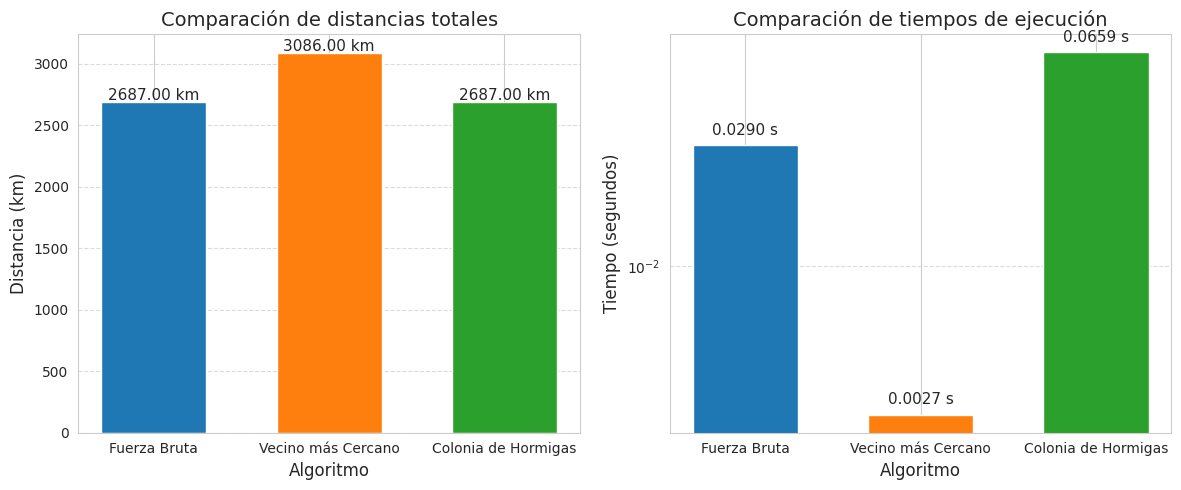

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def crear_graficos_barras_comparativos(resultados):
    """
    Crear visualizaciones comparativas en gráficos de barras
    """
    # Extraer datos
    algoritmos = [resultado[0] for resultado in resultados]
    distancias = [resultado[1] for resultado in resultados]
    tiempos = [resultado[2] for resultado in resultados]

    # Configurar estilo
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 5))

    # GRÁFICO 1: DISTANCIAS
    plt.subplot(1, 2, 1)
    # Crear barras con colores distintos para cada algoritmo
    colores = ['#1f77b4', '#ff7f0e', '#2ca02c']
    bars = plt.bar(algoritmos, distancias, color=colores, width=0.6)

    # Añadir etiquetas y título
    plt.title('Comparación de distancias totales', fontsize=14)
    plt.xlabel('Algoritmo', fontsize=12)
    plt.ylabel('Distancia (km)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Añadir valores sobre las barras
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 20,
                f'{height:.2f} km', ha="center", fontsize=11)

    # GRÁFICO 2: TIEMPOS DE EJECUCIÓN
    plt.subplot(1, 2, 2)
    bars = plt.bar(algoritmos, tiempos, color=colores, width=0.6)

    # Añadir etiquetas y título
    plt.title('Comparación de tiempos de ejecución', fontsize=14)
    plt.xlabel('Algoritmo', fontsize=12)
    plt.ylabel('Tiempo (segundos)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Escala logarítmica para visualizar mejor las diferencias
    plt.yscale('log')

    # Añadir valores sobre las barras
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height * 1.1,
                f'{height:.4f} s', ha="center", fontsize=11)

    plt.tight_layout()
    plt.savefig('comparacion_barras.png', dpi=300, bbox_inches='tight')
    plt.show()

# Datos de ejemplo (puedes reemplazar con tus resultados reales)
resultados = [
    ('Fuerza Bruta', 2687.00, 0.0290),
    ('Vecino más Cercano', 3086.00, 0.0027),
    ('Colonia de Hormigas', 2687.00, 0.0659)
]

# Ejecutar la función
crear_graficos_barras_comparativos(resultados)

In [ ]:
import folium
from folium.features import DivIcon
from IPython.display import display

def crear_mapa_comparativo_correcto(resultados):
    """
    Crea un mapa interactivo que muestra exactamente las dos rutas correctas
    """
    # Coordenadas de las ciudades colombianas
    coords = {
        'Bogotá': [4.6097, -74.0817],
        'Medellín': [6.2476, -75.5658],
        'Cali': [3.4516, -76.5320],
        'Barranquilla': [10.9685, -74.7813],
        'Cartagena': [10.3997, -75.5144]
    }

    # Distancias extraídas de los resultados
    distancia_optima = 2687.00  # Ruta óptima por Fuerza Bruta
    distancia_nn = 3086.00      # Ruta subóptima por Vecino más Cercano

    # DEFINIR EXPLÍCITAMENTE LAS RUTAS EXACTAS
    # Ruta óptima (Fuerza Bruta)
    ruta_optima = ['Bogotá', 'Barranquilla', 'Cartagena', 'Medellín', 'Cali', 'Bogotá']

    # Ruta del Vecino más Cercano (la secuencia correcta según los datos)
    ruta_nn = ['Bogotá', 'Medellín', 'Cali', 'Cartagena', 'Barranquilla', 'Bogotá']

    # Crear mapa centrado en Colombia
    mapa = folium.Map(
        location=[6.5, -74.3],
        zoom_start=6,
        tiles='cartodbpositron'
    )

    # Añadir ciudades como marcadores
    for ciudad in coords:
        color_marker = 'darkblue' if ciudad == 'Bogotá' else 'blue'
        icono = 'home' if ciudad == 'Bogotá' else 'map-marker'
        folium.Marker(
            location=coords[ciudad],
            popup=f"<b>{ciudad}</b>",
            tooltip=ciudad,
            icon=folium.Icon(color=color_marker, icon=icono, prefix='fa')
        ).add_to(mapa)

    # Añadir la ruta óptima (Fuerza Bruta)
    ruta_optima_coords = [coords[ciudad] for ciudad in ruta_optima if ciudad in coords]
    folium.PolyLine(
        locations=ruta_optima_coords,
        color='#0066CC',  # Azul
        weight=4,
        opacity=0.8,
        tooltip=f"Ruta Óptima: {distancia_optima:.2f} km",
        name="Ruta Óptima (Fuerza Bruta)"
    ).add_to(mapa)

    # Añadir la ruta del Vecino más Cercano
    ruta_nn_coords = [coords[ciudad] for ciudad in ruta_nn if ciudad in coords]
    folium.PolyLine(
        locations=ruta_nn_coords,
        color='#FF6600',  # Naranja
        weight=4,
        opacity=0.8,
        tooltip=f"Vecino más Cercano: {distancia_nn:.2f} km",
        name="Vecino más Cercano"
    ).add_to(mapa)

    # Añadir números de orden para la ruta óptima
    for i, ciudad in enumerate(ruta_optima[1:-1], 1):
        folium.map.Marker(
            coords[ciudad],
            icon=DivIcon(
                icon_size=(150,36),
                icon_anchor=(0,0),
                html=f'<div style="font-size: 12pt; color: #0066CC; font-weight: bold; background-color: white; border: 2px solid #0066CC; border-radius: 50%; width: 24px; height: 24px; text-align: center; line-height: 22px; box-shadow: 0 0 3px rgba(0,0,0,0.3);">{i}</div>',
            )
        ).add_to(mapa)

    # Añadir números de orden para la ruta del Vecino más Cercano
    for i, ciudad in enumerate(ruta_nn[1:-1], 1):
        # Desplazamiento para diferenciar los números
        lat_offset = 0.15 if ciudad in ['Medellín', 'Cali'] else 0.15
        lng_offset = 0.15 if ciudad in ['Barranquilla', 'Cartagena'] else 0.15

        folium.map.Marker(
            [coords[ciudad][0] + lat_offset, coords[ciudad][1] + lng_offset],
            icon=DivIcon(
                icon_size=(150,36),
                icon_anchor=(0,0),
                html=f'<div style="font-size: 12pt; color: #FF6600; font-weight: bold; background-color: white; border: 2px solid #FF6600; border-radius: 50%; width: 24px; height: 24px; text-align: center; line-height: 22px; box-shadow: 0 0 3px rgba(0,0,0,0.3);">{i}</div>',
            )
        ).add_to(mapa)

    # Control de capas
    folium.LayerControl().add_to(mapa)

    # Diferencia porcentual
    diferencia = ((distancia_nn - distancia_optima) / distancia_optima) * 100

    # Leyenda completa
    legend_html = '''
    <div style="position: fixed; bottom: 30px; right: 30px; width: 280px;
        border:2px solid grey; z-index:9999; font-size:12px; background-color:white;
        padding: 12px; border-radius: 6px; box-shadow: 0 0 5px rgba(0,0,0,0.2);">
        <div style="font-weight: bold; font-size: 14px; margin-bottom: 10px; text-align: center;">Comparación de Rutas</div>

        <p><i class="fa fa-minus" style="color:#0066CC; font-size: 16px;"></i> <b>Ruta Óptima:</b> {:.2f} km</p>
        <div style="font-size: 11px; margin-left: 20px; margin-bottom: 8px;">
            Bogotá → Barranquilla → Cartagena → Medellín → Cali → Bogotá
        </div>

        <p><i class="fa fa-minus" style="color:#FF6600; font-size: 16px;"></i> <b>Vecino más Cercano:</b> {:.2f} km</p>
        <div style="font-size: 11px; margin-left: 20px; margin-bottom: 8px;">
            Bogotá → Medellín → Cali → Cartagena → Barranquilla → Bogotá
        </div>

        <div style="margin-top: 8px; padding-top: 8px; border-top: 1px solid #ccc;">
            <b>Diferencia:</b> <span style="color:#FF6600; font-weight: bold;">+{:.2f}%</span>
        </div>
    </div>
    '''.format(distancia_optima, distancia_nn, diferencia)

    mapa.get_root().html.add_child(folium.Element(legend_html))

    # Guardar el mapa
    mapa.save('comparacion_rutas_corregida.html')

    return mapa

# Datos de ejemplo
resultados = [
    ('Fuerza Bruta', 2687.00, 0.0351),
    ('Vecino más Cercano', 3086.00, 0.0027),
    ('Colonia de Hormigas', 2687.00, 0.0659)
]

mapa = crear_mapa_comparativo_correcto(resultados)
display(mapa)

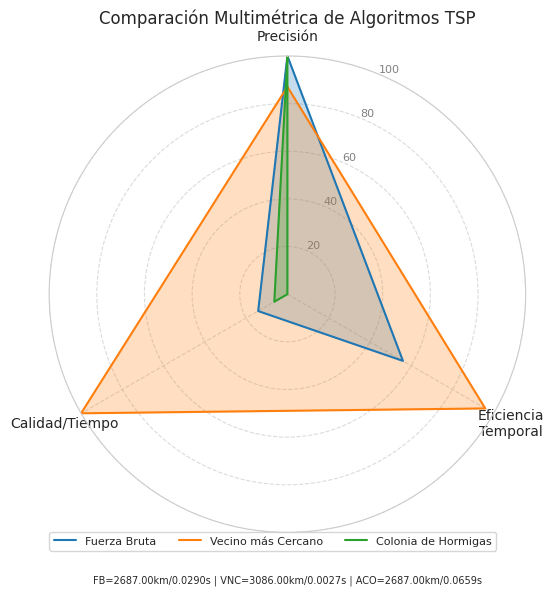

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def crear_grafico_radar(resultados):
    """
    Crea un gráfico radar compacto para comparar múltiples métricas de los algoritmos
    """
    # Extraer datos de los resultados
    algoritmos = [resultado[0] for resultado in resultados]
    distancias = [resultado[1] for resultado in resultados]
    tiempos = [resultado[2] for resultado in resultados]

    # Preparar métricas para el radar chart
    min_distancia = min(distancias)
    precision = [(min_distancia / d) * 100 for d in distancias]

    max_tiempo = max(tiempos)
    eficiencia_temporal = [(1 - (t / max_tiempo)) * 100 for t in tiempos]

    calidad_tiempo = [(p / (t + 0.001)) for p, t in zip(precision, tiempos)]
    max_ct = max(calidad_tiempo)
    calidad_tiempo_norm = [(ct / max_ct) * 100 for ct in calidad_tiempo]

    # Crear figura y axis para el radar chart con tamaño reducido
    fig = plt.figure(figsize=(7, 5.5))
    ax = fig.add_subplot(111, polar=True)

    # Categorías y ángulos para el radar chart
    categories = ['Precisión', 'Eficiencia\nTemporal', 'Calidad/Tiempo']
    N = len(categories)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Cerrar el polígono

    # Colores para cada algoritmo
    colores = ['#1f77b4', '#ff7f0e', '#2ca02c']

    # Dibujar una línea para cada algoritmo
    for i, algoritmo in enumerate(algoritmos):
        valores = [precision[i], eficiencia_temporal[i], calidad_tiempo_norm[i]]
        valores += valores[:1]  # Cerrar el polígono

        # Dibujar línea y rellenar área
        ax.plot(angles, valores, linewidth=1.5, linestyle='solid',
                label=algoritmo, color=colores[i])
        ax.fill(angles, valores, alpha=0.25, color=colores[i])

    # Personalizar el gráfico
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Establecer las etiquetas de categorías - tamaño reducido
    plt.xticks(angles[:-1], categories, size=10)

    # Establecer límites y etiquetas para los ejes radiales - tamaño reducido
    ax.set_ylim(0, 100)
    plt.yticks([20, 40, 60, 80, 100], ['20', '40', '60', '80', '100'], color="grey", size=8)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Añadir título con tamaño reducido
    plt.title('Comparación Multimétrica de Algoritmos TSP', size=12, y=1.05)

    # Leyenda más compacta
    plt.legend(loc='lower right', bbox_to_anchor=(0.95, -0.05),
               frameon=True, fontsize=8, ncol=3)

    # Información compacta al pie del gráfico
    plt.figtext(0.5, -0.05,
                f"FB={distancias[0]:.2f}km/{tiempos[0]:.4f}s | VNC={distancias[1]:.2f}km/{tiempos[1]:.4f}s | ACO={distancias[2]:.2f}km/{tiempos[2]:.4f}s",
                ha="center", fontsize=7)

    plt.tight_layout(pad=0.5)
    return fig, None  # Ya no devolvemos la tabla para mantenerlo compacto

# Datos de ejemplo
resultados = [
    ('Fuerza Bruta', 2687.00, 0.0290),
    ('Vecino más Cercano', 3086.00, 0.0027),
    ('Colonia de Hormigas', 2687.00, 0.0659)
]

# Crear la visualización
fig, _ = crear_grafico_radar(resultados)

## **Conclusión:**

El análisis de los tres algoritmos aplicados al TSP en ciudades colombianas muestra resultados notables:

En términos de distancia, tanto Fuerza Bruta como Colonia de Hormigas encontraron la ruta óptima de 2687 km, mientras que el algoritmo del Vecino más Cercano produjo una ruta subóptima de 3086 km, aproximadamente un 14.9% más larga.

Respecto a eficiencia temporal, el Vecino más Cercano destaca significativamente con solo 0.0027 segundos de ejecución, siendo aproximadamente 10 veces más rápido que Fuerza Bruta (0.0290s) y 24 veces más rápido que Colonia de Hormigas (0.0659s).

La visualización de rutas muestra que el algoritmo del Vecino más Cercano, al elegir siempre la ciudad más próxima, genera un recorrido menos eficiente (Bogotá→Medellín→Cali→Cartagena→Barranquilla→Bogotá) que cruza innecesariamente el país, mientras que la ruta óptima (Bogotá→Barranquilla→Cartagena→Medellín→Cali→Bogotá) optimiza la secuencia de visitas.

El análisis multimétrico revela que el Vecino más Cercano destaca en eficiencia temporal y relación calidad/tiempo a pesar de su menor precisión, mientras que Colonia de Hormigas iguala la precisión de Fuerza Bruta pero con mayor costo computacional.

En resumen, cada algoritmo ofrece ventajas distintas: Fuerza Bruta garantiza optimidad, Vecino más Cercano prioriza velocidad, y Colonia de Hormigas equilibra precisión con escalabilidad para problemas más complejos.